## Initial analysis of the life expectancy dataset

> ***I am going to start with an attempt to merge the countries together and make a useful analysis of some sort.***

In [10]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 13.4 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 10.9 MB 13.4 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 29.6 MB/s eta 0:00:01
  Using cached seaborn-0.12.0-py3-none-any.whl (285 kB)
     |████████████████████████████████| 500 kB 24.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 50.7 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 960 kB 17.1 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 226 kB 29.0 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgradi

In [94]:
# Import packates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
life_data = pd.read_csv('https://github.com/andrewkroening/orange-modeling-project/blob/main/_00_Datasets/Life_Expectancy_Data.csv?raw=true')

> ***Next I will drop the nan values***

In [99]:
# Drop rows with NA values
life_data = life_data.dropna()

> ***Now I will try to write a script that combines all year data and provides a single value for each country in each column. This took a while and I had to do some...stuff.***

In [151]:
# use the groupby to get the mean of each column, grouped by country and drop year

life_data_avg = life_data.groupby('Country').mean(numeric_only = True).drop(columns = 'Year', axis = 1)

# export the data to a csv file
life_data_avg.to_csv('life_data_avg.csv')


In [148]:
# doing this the easy way, get start values for each country and save the ouput as a new dataframe

life_data_start = life_data.groupby('Country').min('Year').copy()

# Export to a csv file
life_data_start.to_csv('life_data_start.csv')

In [150]:
# then get the end values for each country

life_data_end = life_data.groupby('Country').max('Year')

# Export to a csv file
life_data_end.to_csv('life_data_end.csv')

> ***Pulling the data back in as proper dataframes to compile***

In [178]:
# Import the life_data_avg.csv file
life_data_avg = pd.read_csv('life_data_avg.csv')

# Import the life_data_start.csv file
life_data_start = pd.read_csv('life_data_start.csv')

# Import the life_data_end.csv file
life_data_end = pd.read_csv('life_data_end.csv')

In [179]:
# make a data frame that is just the name of each country
life_data_trends = pd.DataFrame(life_data['Country'].unique(), columns = ['Country'])

In [180]:
# add a column that has the number of years for each country between its start and end years
life_data_trends['Years'] = life_data_end['Year'] - life_data_start['Year']

In [181]:
# make a 'trend' column for each additional column that is the end value minus the start value
life_data_trends['Life Expectancy Trend'] = life_data_end['Life expectancy '] - life_data_start['Life expectancy ']
life_data_trends['Adult Mortality Trend'] = life_data_end['Adult Mortality'] - life_data_start['Adult Mortality']
life_data_trends['Infant Deaths Trend'] = life_data_end['infant deaths'] - life_data_start['infant deaths']
life_data_trends['Alcohol Trend'] = life_data_end['Alcohol'] - life_data_start['Alcohol']
life_data_trends['Percentage Expenditure Trend'] = life_data_end['percentage expenditure'] - life_data_start['percentage expenditure']
life_data_trends['Hepatitis B Trend'] = life_data_end['Hepatitis B'] - life_data_start['Hepatitis B']
life_data_trends['Measles Trend'] = life_data_end['Measles '] - life_data_start['Measles ']
life_data_trends['BMI Trend'] = life_data_end[' BMI '] - life_data_start[' BMI ']
life_data_trends['Under-Five Deaths Trend'] = life_data_end['under-five deaths '] - life_data_start['under-five deaths ']
life_data_trends['Polio Trend'] = life_data_end['Polio'] - life_data_start['Polio']
life_data_trends['Total Expenditure Trend'] = life_data_end['Total expenditure'] - life_data_start['Total expenditure']
life_data_trends['Diphtheria Trend'] = life_data_end['Diphtheria '] - life_data_start['Diphtheria ']
life_data_trends['HIV/AIDS Trend'] = life_data_end[' HIV/AIDS'] - life_data_start[' HIV/AIDS']
life_data_trends['GDP Trend'] = life_data_end['GDP'] - life_data_start['GDP']
life_data_trends['Population Trend'] = life_data_end['Population'] - life_data_start['Population']
life_data_trends['Income Composition of Resources Trend'] = life_data_end['Income composition of resources'] - life_data_start['Income composition of resources']
life_data_trends['Schooling Trend'] = life_data_end['Schooling'] - life_data_start['Schooling']

In [184]:
# merge the life_data_avg and life_data_trends dataframes
life_data_composite = life_data_trends.merge(life_data_avg, on = 'Country')

# Reorder the columns: Country, Years, Life Expectancy Trend, Life Expectancy, Adult Mortality Trend, Adult Mortality, etc.
life_data_composite = life_data_composite[['Country', 'Years', 'Life Expectancy Trend', 'Life expectancy ', 'Adult Mortality Trend', 'Adult Mortality', 'Infant Deaths Trend', 'infant deaths', 'Alcohol Trend', 'Alcohol', 'Percentage Expenditure Trend', 'percentage expenditure', 'Hepatitis B Trend', 'Hepatitis B', 'Measles Trend', 'Measles ', 'BMI Trend', ' BMI ', 'Under-Five Deaths Trend', 'under-five deaths ', 'Polio Trend', 'Polio', 'Total Expenditure Trend', 'Total expenditure', 'Diphtheria Trend', 'Diphtheria ', 'HIV/AIDS Trend', ' HIV/AIDS', 'GDP Trend', 'GDP', 'Population Trend', 'Population', 'Income Composition of Resources Trend', 'Income composition of resources', 'Schooling Trend', 'Schooling']]

/var/folders/79/hh7cth4s3p3dbtdpc8j1m9bm0000gn/T/ipykernel_3915/801332316.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  life_data_composite_corr = life_data_composite.corr()


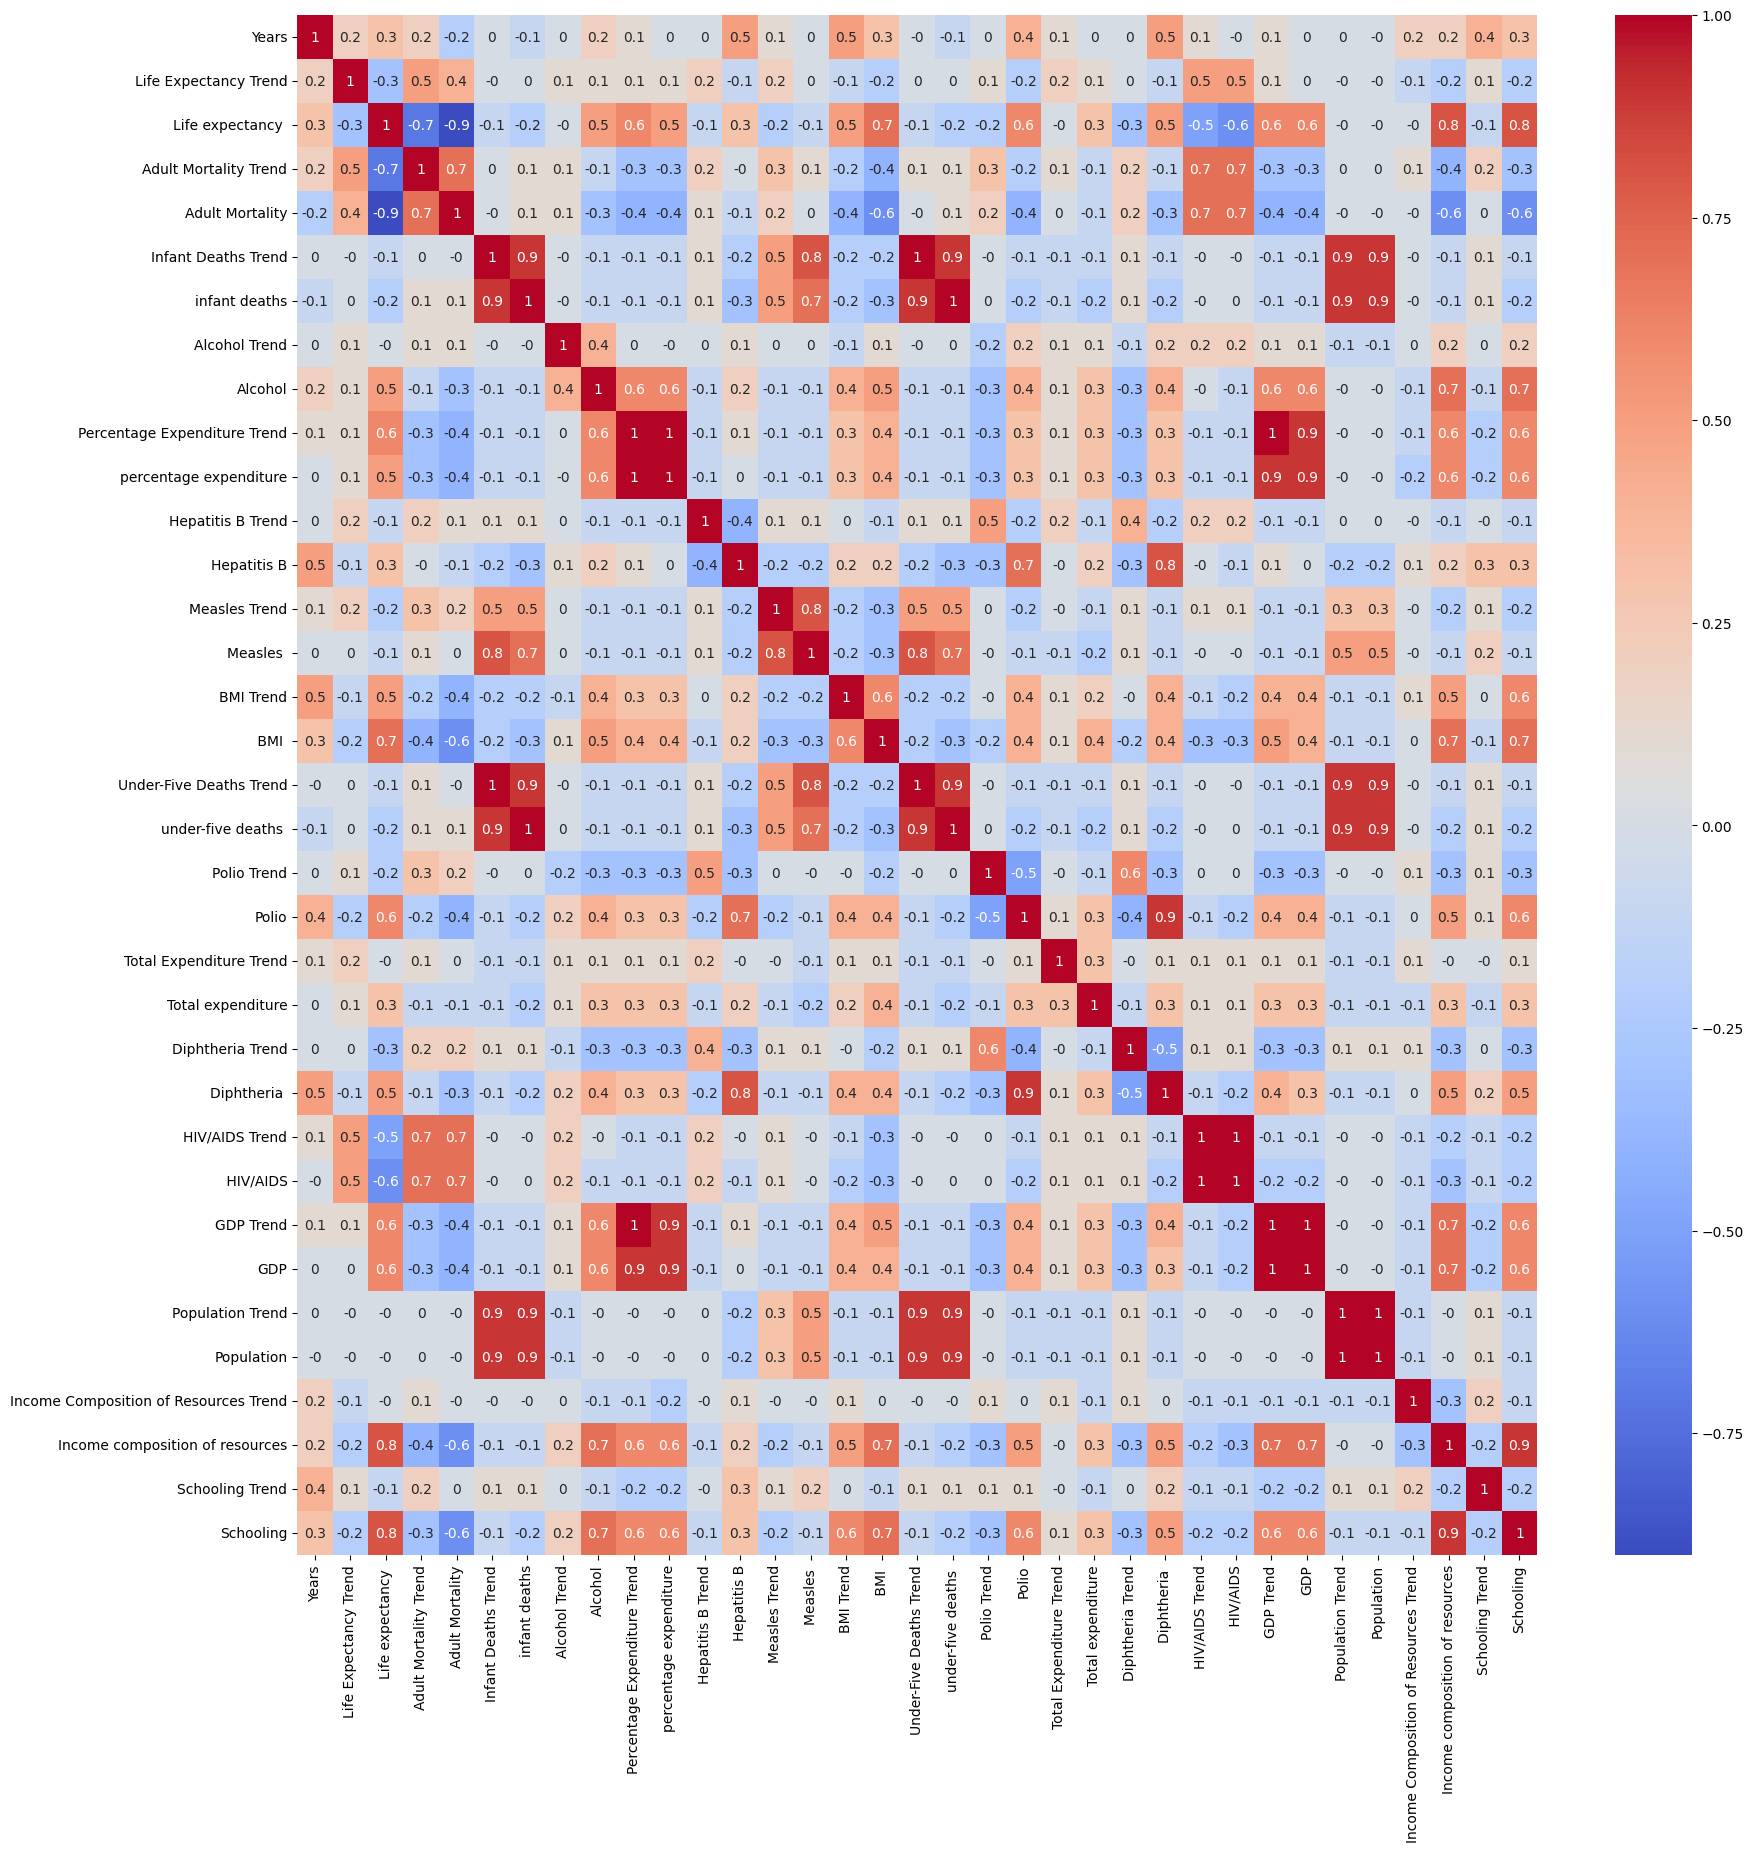

<Figure size 640x480 with 0 Axes>

In [188]:
# Create a corrleation matrix for the composite data
life_data_composite_corr = life_data_composite.corr()

# round the values to 1 decimal place
life_data_composite_corr = life_data_composite_corr.round(1)

# Create a heatmap of the correlation matrix
plt.figure(figsize = (20, 20))
sns.heatmap(life_data_composite_corr, annot = True, cmap = 'coolwarm')
plt.show()


In [189]:
#export the composite data to a csv file in the _00_Datasets folder
life_data_composite.to_csv('../_00_Datasets/life_data_composite.csv') 


In [ ]:
# Export the correlations matrix heatmap to a png file in the current directory
plt.savefig('life_data_composite_corr.png')